1 - visualizando a planilha

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

tabela = pd.read_csv("PDA_Dados_Cursos_Graduacao_Brasil.csv")

display(tabela.head(6))

,CODIGO_IES,NOME_IES,CATEGORIA_ADMINISTRATIVA,ORGANIZACAO_ACADEMICA,CODIGO_CURSO,NOME_CURSO,GRAU,AREA_OCDE,MODALIDADE,SITUACAO_CURSO,QT_VAGAS_AUTORIZADAS,CARGA_HORARIA,CODIGO_AREA_OCDE_CINE,AREA_OCDE_CINE,CODIGO_MUNICIPIO,MUNICIPIO,UF,REGIAO
0,4751,CENTRO UNIVERSITÁRIO UNIFATECIE,Privada com fins lucrativos,Centro Universitário,1556773,ENGENHARIA AGRONÔMICA,Bacharelado,Agronomia,Educação a Distância,Em atividade,1000,4400,301,Agronomia,3541406,Presidente Prudente,SP,SUDESTE
1,1491,CENTRO UNIVERSITÁRIO INTERNACIONAL,Privada com fins lucrativos,Centro Universitário,1186955,LETRAS,Licenciatura,Formação de professor de língua/literatura ver...,Educação a Distância,Em atividade,3000,3992,58,Formação de professor de língua/literatura ver...,2516201,Sousa,PB,NORDESTE
2,1472,CENTRO UNIVERSITÁRIO LEONARDO DA VINCI,Privada com fins lucrativos,Centro Universitário,99950,GEOGRAFIA,Licenciatura,Formação de professor de geografia,Educação a Distância,Em atividade,7620,3500,39,Formação de professor de geografia,2800308,Aracaju,SE,NORDESTE
3,221,UNIVERSIDADE CRUZEIRO DO SUL,Privada com fins lucrativos,Universidade,1467998,EDUCAÇÃO FÍSICA,Bacharelado,Educação física,Educação a Distância,Em atividade,1200,3200,328,Educação física,4113205,Lapa,PR,SUL
4,1472,CENTRO UNIVERSITÁRIO LEONARDO DA VINCI,Privada com fins lucrativos,Centro Universitário,1516788,SERVIÇOS PENAIS,Tecnológico,NaN,Educação a Distância,Em atividade,1500,1980,357,Serviços penais,2601706,Belo Jardim,PE,NORDESTE
5,926,Centro Universitário Anhanguera Pitágoras Unop...,Privada com fins lucrativos,Centro Universitário,1563004,GESTÃO COMERCIAL,Tecnológico,NaN,Educação a Distância,Em atividade,3000,1700,162,Gestão comercial,3540705,Porto Ferreira,SP,SUDESTE


2 - criando um dataframe e verificando vagas autorizadas, agrupadas em municipio, cursos, uf e regiao

In [32]:
df = pd.DataFrame(tabela)

regiao = df[df['MUNICIPIO'] == 'Conselheiro Lafaiete']

cursos_ativos = regiao[["NOME_CURSO", "NOME_IES", "MUNICIPIO", "UF", "REGIAO", "QT_VAGAS_AUTORIZADAS"]].groupby(["NOME_CURSO", "NOME_IES", "MUNICIPIO", "UF", "REGIAO"]).sum()

display(cursos_ativos)

cursos_ativos.to_excel("cursos_lafaiete.xlsx")

QT_VAGAS_AUTORIZADAS
NOME_CURSO                                         NOME_IES                                           MUNICIPIO            UF REGIAO                       
ABI - EDUCAÇÃO FÍSICA                              Faculdade Presidente Antônio Carlos de Conselhe... Conselheiro Lafaiete MG SUDESTE                     0
ACONSELHAMENTO TUTELAR PARA INFÂNCIA E ADOLESCÊ... CENTRO UNIVERSITÁRIO INTERNACIONAL                 Conselheiro Lafaiete MG SUDESTE                  1500
ADMINISTRAÇÃO                                      CENTRO UNIVERSITÁRIO ANHANGUERA PITÁGORAS AMPLI    Conselheiro Lafaiete MG SUDESTE                  5000
                                                   CENTRO UNIVERSITÁRIO DO SUL DE MINAS               Conselheiro Lafaiete MG SUDESTE                   150
                                                   CENTRO UNIVERSITÁRIO ESTÁCIO DE RIBEIRÃO PRETO     Conselheiro Lafaiete MG SUDESTE                  1196
...                                                                                                                                                     ...
TURISMO                                            Centro Universitário Santa Rita                    Conselheiro Lafaiete MG SUDESTE                   100
TÉCNICAS PARA ACOMPANHAMENTO TERAPÊUTICO           CENTRO UNIVERSITÁRIO LEONARDO DA VINCI             Conselheiro Lafaiete MG SUDESTE                  7610
TÉCNICAS PARA TELEMEDICINA                         CENTRO UNIVERSITÁRIO LEONARDO DA VINCI             Conselheiro Lafaiete MG SUDESTE                  7610
VAREJO DIGITAL                                     CENTRO UNIVERSITÁRIO INTERNACIONAL                 Conselheiro Lafaiete MG SUDESTE                  2000
                                                   CENTRO UNIVERSITÁRIO LEONARDO DA VINCI             Conselheiro Lafaiete MG SUDESTE                  7610

[1050 rows x 1 columns]

3 - Analisando vagas autorizadas e mostrando a quantidade de cada categoria administrativa

In [41]:
df2 = pd.DataFrame(tabela)

cidade = df[df['MUNICIPIO'] == 'Conselheiro Lafaiete']

cursos_lafaiete = cidade[["CATEGORIA_ADMINISTRATIVA", "QT_VAGAS_AUTORIZADAS"]].groupby("CATEGORIA_ADMINISTRATIVA").sum()

display(cursos_lafaiete)

cursos_lafaiete.to_excel("vagas_lafaiete.xlsx")

,QT_VAGAS_AUTORIZADAS
CATEGORIA_ADMINISTRATIVA,
Privada com fins lucrativos,7396629
Privada sem fins lucrativos,68810
Pública Federal,3030


4 - Analisando o número de vagas e as devidas categorias administrativas para minha cidade (Conselheiro Lafaiete)

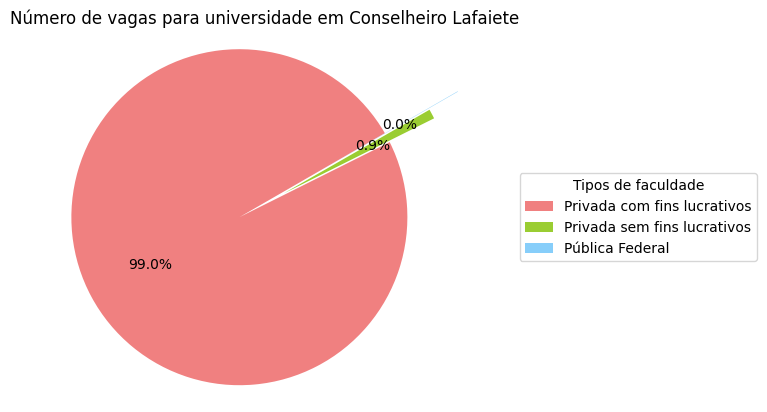

In [42]:
import matplotlib.pyplot as plt

tabelacl = pd.read_excel("vagas_lafaiete.xlsx")

tipo_facu = tabelacl['CATEGORIA_ADMINISTRATIVA']
qtd_vagas = tabelacl['QT_VAGAS_AUTORIZADAS']

plt.title("Número de vagas para universidade em Conselheiro Lafaiete")

explo = (0, 0.3, 0.5)
cores = ['lightcoral', 'yellowgreen', 'lightskyblue']
plt.pie(qtd_vagas, explode=explo, colors=cores, startangle=30, autopct="%1.1f%%")

legendas = plt.legend(tipo_facu, title="Tipos de faculdade", bbox_to_anchor=(1, 0.5), loc="center left")

plt.savefig('Numero_vagas_CL.png', bbox_inches='tight')

plt.axis('equal')
plt.show()

5 - Categorias administrativas por regiões brasileiras

CATEGORIA_ADMINISTRATIVA,Especial,Privada com fins lucrativos,Privada sem fins lucrativos,Pública Estadual,Pública Federal,Pública Municipal
REGIAO,,,,,,
CENTRO-OESTE,0,66706,10255,888,1731,238
IGNORADO/EXTERIOR,0,422,186,0,0,0
NORDESTE,170,181656,12922,3566,4305,349
NORTE,0,72654,6942,1152,1890,132
SUDESTE,176,281872,56189,3082,4010,2526
SUL,437,158144,25529,1292,2866,389


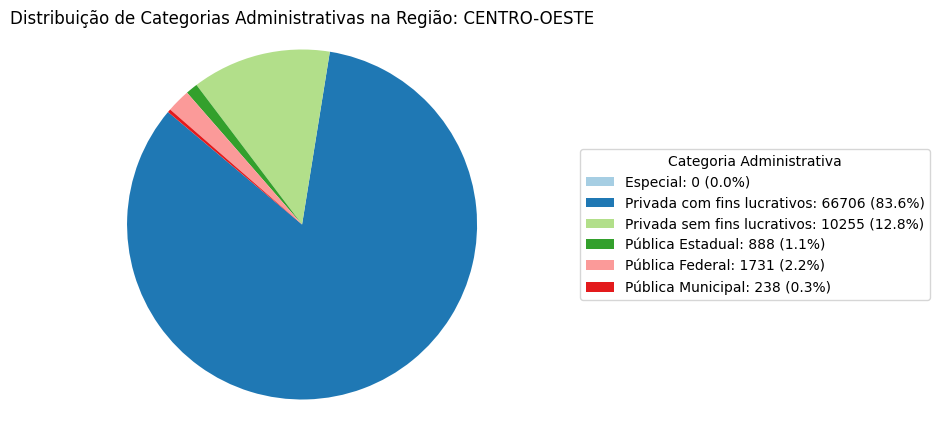

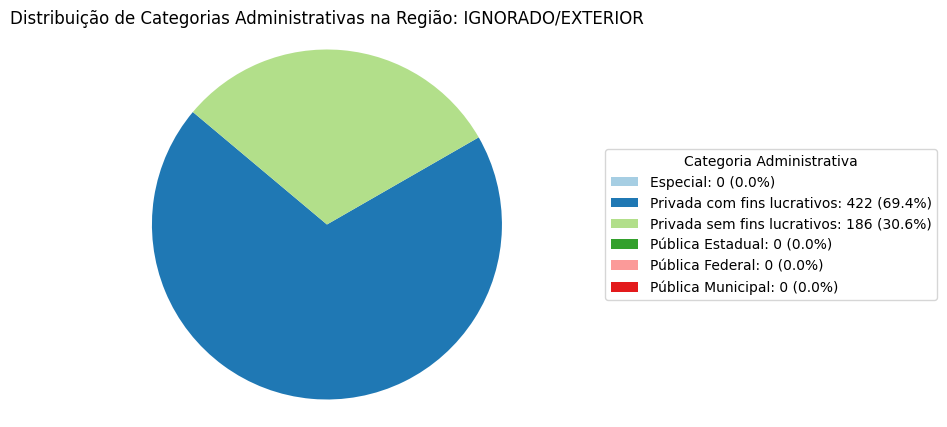

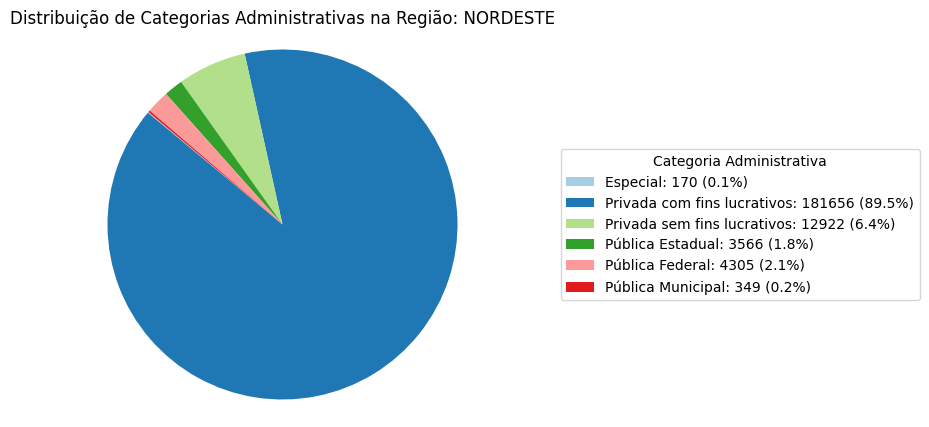

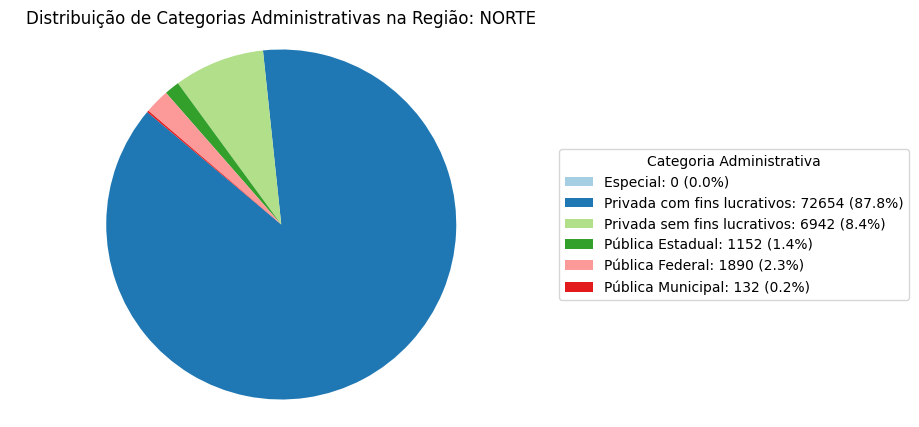

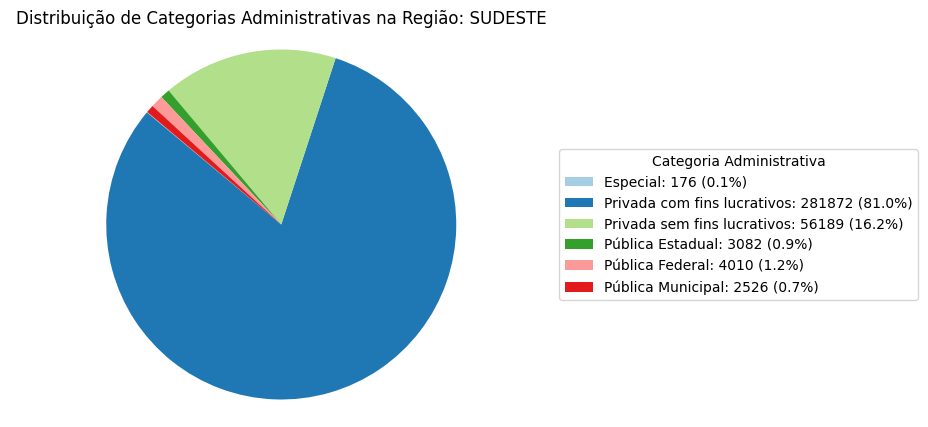

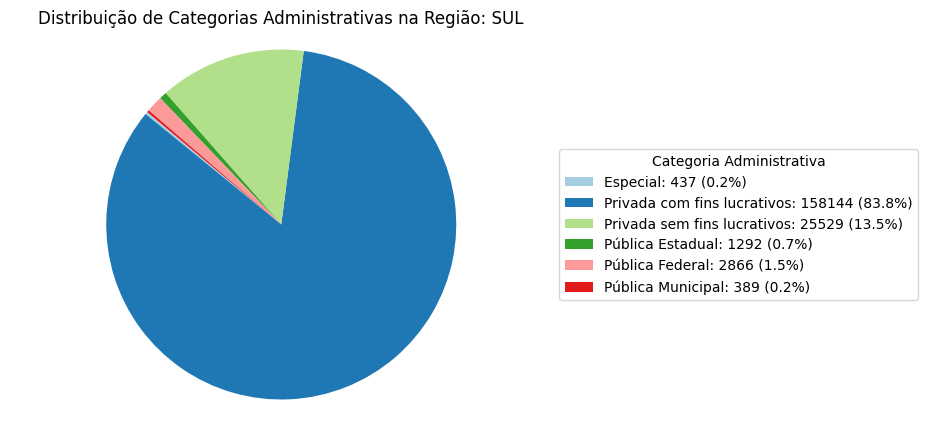

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

categoria_regiao = pd.crosstab(tabela['REGIAO'], tabela['CATEGORIA_ADMINISTRATIVA'])

display(categoria_regiao)

regioes = ['CENTRO_OESTE', 'IGNORADO_EXTERIOR', 'NORDESTE', 'NORTE', 'SUDESTE', 'SUL']

if len(regioes) != len(categoria_regiao.index):
    print("Aviso: O número de regiões no mapeamento não coincide com as regiões na tabela.")
    
for i, regiao in enumerate(categoria_regiao.index):
    
    valores = categoria_regiao.loc[regiao]
    total = sum(valores)
    
    legend_labels = [f'{cat}: {val} ({val/total:.1%})' for cat, val in zip(categoria_regiao.columns, valores)]
    
    fig, ax = plt.subplots(figsize=(7, 5))
    wedges, texts = ax.pie(
        valores,
        startangle=140,
        colors=plt.cm.Paired.colors
    )

    ax.legend(wedges, legend_labels, title="Categoria Administrativa", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    ax.set_title(f'Distribuição de Categorias Administrativas na Região: {regiao}')
    ax.axis('equal')


    plt.savefig(f"Gráfico_Categorias_Adm_Região_{regioes[i]}.png", bbox_inches='tight')
    
    # Mostrando o gráfico
    plt.show()


5 - Analise das modalidades dos cursos do Brasil

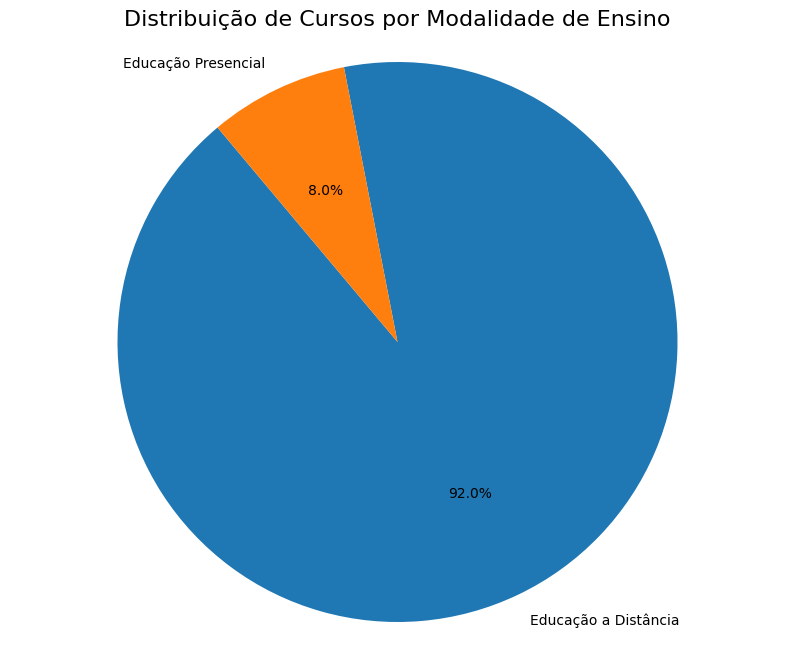

In [44]:
modalidade_ensino = tabela['MODALIDADE'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(
    modalidade_ensino.values, 
    labels=modalidade_ensino.index, 
    autopct='%1.1f%%', 
    startangle=130,
)
plt.title('Distribuição de Cursos por Modalidade de Ensino', fontsize=16)
plt.axis('equal')
plt.savefig("Gráfico_Modalidade_Ensino.png", bbox_inches='tight')
plt.show()

6 - Tipos de instituições mais escolhidas

CATEGORIA_ADMINISTRATIVA
Especial                           220864
Privada com fins lucrativos    5650874747
Privada sem fins lucrativos      96356987
Pública Estadual                  5746693
Pública Federal                   2293245
Pública Municipal                 4669473
Name: QT_VAGAS_AUTORIZADAS, dtype: int64

C:\Users\mathc\AppData\Local\Temp\ipykernel_11248\3391179803.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['Especial', 'Priv c/ fins \nlucrativos', 'Priv s/ fins \nlucrativos', 'Pública Est', 'Pública Fed', 'Pública Mun'])


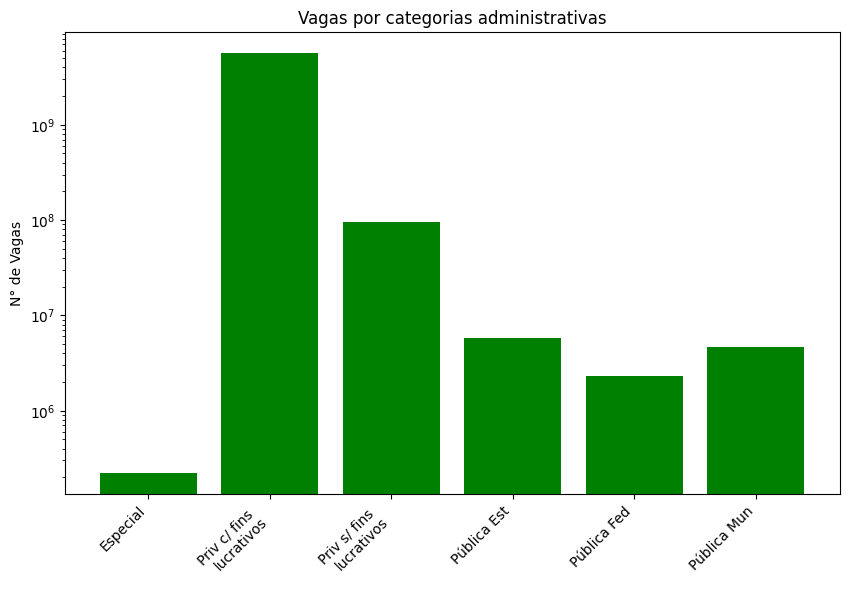

In [61]:
vagas_instituicoes = tabela.groupby('CATEGORIA_ADMINISTRATIVA')['QT_VAGAS_AUTORIZADAS'].sum()
display(vagas_instituicoes)

instituicoes = vagas_instituicoes.index
vagas_inst = vagas_instituicoes.values

plt.figure(figsize=(10, 6))
plt.bar(instituicoes, vagas_inst, color='green')

plt.title('Vagas por categorias administrativas')
plt.ylabel('N° de Vagas')

plt.yscale('log')

plt.xticks(rotation=45, ha='right')
plt.gca().set_xticklabels(['Especial', 'Priv c/ fins \nlucrativos', 'Priv s/ fins \nlucrativos', 'Pública Est', 'Pública Fed', 'Pública Mun'])

plt.savefig("categoria_administrativas.png")

plt.show()